In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly
import cufflinks as cf
cf.go_offline()

C:\ProgramData\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


Data from May-2019 to May-2020
Significant events timeline (https://www.who.int/news-room/detail/27-04-2020-who-timeline---covid-19):

Dec-19
    
    31/12/20 - China notifies WHO, first cluster in Wuhan
    
Jan-20

    13/01/20 - First case confirmed outside of China
    30/01/20 - Classified as Public Health Emergency of International Concern (PHEIC)
    31/01/20 - First cases confirmed in UK
    
Mar-20   

    03/03/20 - UK govt. publishes action plan
    05/03/20 - First UK death
    09/03/20 - FTSE 100 drops 8%
    11/03/20 - Classified as Pandemic, UK bank base rate dropped to 0.25%, FTSE further drop 10%
    16/03/20 - UK govt. advises against all but essential travel and social contact
    20/03/20 - UK schools, pubs, restaurants close
    23/03/20 - UK partial lockdown (essential travel only)

In [2]:
start = datetime.date(2019,5,1)
end = datetime.date(2020,5,1)
print(start, end)

2019-05-01 2020-05-01


Dataframes for:

Balfour Beatty (BBY.L),

Kier Group (KIE.L),

Interserve (IRV.L - note, no Yahoo data, Costain added),

Galliford Try (GFRD.L),

Morgan Sindall (MGNS.L),

Costain (COST.L)

and

FTSE 100 - data from https://uk.investing.com/indices/uk-100-historical-data

In [3]:
BBY = data.DataReader("BBY.L", 'yahoo', start, end)
KIE = data.DataReader("KIE.L", 'yahoo', start, end)
GFRD = data.DataReader("GFRD.L", 'yahoo', start, end)
COST = data.DataReader("COST.L", 'yahoo', start, end)
FTSE = pd.read_csv('FTSE_100_May_19_May_20.csv',thousands = ',')

In [4]:
FTSE.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"May 01, 2020",5763.06,5901.21,5901.21,5746.06,781.33M,-2.34%
1,"Apr 30, 2020",5901.21,6115.25,6151.58,5897.91,1.93B,-3.50%
2,"Apr 29, 2020",6115.25,5958.50,6129.60,5950.83,1.29B,2.63%
3,"Apr 28, 2020",5958.50,5846.79,5977.76,5835.92,1.20B,1.91%
4,"Apr 27, 2020",5846.79,5752.23,5855.61,5752.23,792.25M,1.64%


Set 'Date' column to index, and change to 'datetime' type

Remove 'Vol.' and 'Change %' Columns,

Rename 'Price' to 'Close',

Reorder to match other datasets, set all to 'float' type.

Check dataframe .head() and .info() to confirm changes

In [5]:
# FTSE['Change %'] = FTSE['Change %'].apply(lambda percent: percent.split('%')[0]) - not needed, removed the columns instead

In [6]:
FTSE.set_index('Date', inplace=True)

In [7]:
FTSE.index = pd.to_datetime(FTSE.index)

In [8]:
FTSE.drop(columns=['Vol.','Change %'],inplace=True)

In [9]:
FTSE.rename(columns={'Price': 'Close'},inplace=True)

In [10]:
FTSE = FTSE[['High','Low','Open','Close']]

In [11]:
FTSE.astype('float', errors = 'ignore').dtypes

High     float64
Low      float64
Open     float64
Close    float64
dtype: object

In [12]:
FTSE.head()

,High,Low,Open,Close
Date,,,,
2020-05-01,5901.21,5746.06,5901.21,5763.06
2020-04-30,6151.58,5897.91,6115.25,5901.21
2020-04-29,6129.60,5950.83,5958.50,6115.25
2020-04-28,5977.76,5835.92,5846.79,5958.50
2020-04-27,5855.61,5752.23,5752.23,5846.79


In [13]:
FTSE.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 255 entries, 2020-05-01 to 2019-05-01
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   High    255 non-null    float64
 1   Low     255 non-null    float64
 2   Open    255 non-null    float64
 3   Close   255 non-null    float64
dtypes: float64(4)
memory usage: 10.0 KB


Add new column to all dataframes for Percentage Change 'Per Chg'

In [14]:
FTSE['Per Chg'] = FTSE.pct_change(axis=1)['Close']

In [15]:
FTSE.head()

,High,Low,Open,Close,Per Chg
Date,,,,,
2020-05-01,5901.21,5746.06,5901.21,5763.06,-0.023410
2020-04-30,6151.58,5897.91,6115.25,5901.21,-0.035001
2020-04-29,6129.60,5950.83,5958.50,6115.25,0.026307
2020-04-28,5977.76,5835.92,5846.79,5958.50,0.019106
2020-04-27,5855.61,5752.23,5752.23,5846.79,0.016439


In [16]:
BBY['Per Chg'] = BBY.pct_change(axis=1)['Close']

In [17]:
KIE['Per Chg'] = KIE.pct_change(axis=1)['Close']

In [18]:
GFRD['Per Chg'] = GFRD.pct_change(axis=1)['Close']

In [19]:
COST['Per Chg'] = COST.pct_change(axis=1)['Close']

List of ticker symbols

In [20]:
tickers = ['BBY.L','KIE.L','GFRD.L','COST.L','FTSE 100']

Create single dataframe with all stock info

In [21]:
const_stocks = pd.concat([BBY,KIE,GFRD,COST,FTSE],keys=tickers,axis=1)
const_stocks.head()

BBY.L                                                 \
                  High         Low        Open       Close     Volume   
Date                                                                    
2019-05-01  253.000000  249.399994  250.600006  251.800003   983599.0   
2019-05-02  251.800003  248.000000  250.000000  248.800003  1613547.0   
2019-05-03  252.800003  246.399994  246.399994  251.600006  1449880.0   
2019-05-07  250.199997  245.399994  247.000000  248.000000  1356369.0   
2019-05-08  251.399994  245.399994  249.000000  250.199997  2034454.0   

                                       KIE.L                          ...  \
             Adj Close   Per Chg        High         Low        Open  ...   
Date                                                                  ...   
2019-05-01  246.238556  0.004788  384.000000  368.799988  374.399994  ...   
2019-05-02  243.304810 -0.004800  382.600006  374.000000  381.000000  ...   
2019-05-03  246.042984  0.021104  379.399994  360.799988  375.000000  ...   
2019-05-07  242.522476  0.004049  363.600006  326.600006  357.799988  ...   
2019-05-08  244.673889  0.004819  368.000000  345.399994  362.600006  ...   

           COST.L                                        FTSE 100           \
             Open  Close    Volume   Adj Close   Per Chg     High      Low   
Date                                                                         
2019-05-01  329.0  333.0   67490.0  325.422760  0.012158  7446.46  7379.65   
2019-05-02  330.5  325.5  343906.0  318.093414 -0.015129  7393.94  7339.45   
2019-05-03  333.5  325.0   83667.0  317.604797 -0.025487  7418.17  7350.01   
2019-05-07  330.0  325.5  181279.0  318.093414 -0.013636  7380.64  7251.03   
2019-05-08  325.0  325.5  105150.0  318.093414  0.001538  7278.26  7222.88   

                                        
               Open    Close   Per Chg  
Date                                    
2019-05-01  7418.22  7385.26 -0.004443  
2019-05-02  7385.26  7351.31 -0.004597  
2019-05-03  7351.31  7380.64  0.003990  
2019-05-07  7380.64  7260.47 -0.016282  
2019-05-08  7260.47  7271.00  0.001450  

[5 rows x 33 columns]

Update column name levels

In [22]:
const_stocks.columns.names = ['Const. Ticker','Stock Info']
const_stocks.head()

Const. Ticker       BBY.L                                                 \
Stock Info           High         Low        Open       Close     Volume   
Date                                                                       
2019-05-01     253.000000  249.399994  250.600006  251.800003   983599.0   
2019-05-02     251.800003  248.000000  250.000000  248.800003  1613547.0   
2019-05-03     252.800003  246.399994  246.399994  251.600006  1449880.0   
2019-05-07     250.199997  245.399994  247.000000  248.000000  1356369.0   
2019-05-08     251.399994  245.399994  249.000000  250.199997  2034454.0   

Const. Ticker                             KIE.L                          ...  \
Stock Info      Adj Close   Per Chg        High         Low        Open  ...   
Date                                                                     ...   
2019-05-01     246.238556  0.004788  384.000000  368.799988  374.399994  ...   
2019-05-02     243.304810 -0.004800  382.600006  374.000000  381.000000  ...   
2019-05-03     246.042984  0.021104  379.399994  360.799988  375.000000  ...   
2019-05-07     242.522476  0.004049  363.600006  326.600006  357.799988  ...   
2019-05-08     244.673889  0.004819  368.000000  345.399994  362.600006  ...   

Const. Ticker COST.L                                        FTSE 100           \
Stock Info      Open  Close    Volume   Adj Close   Per Chg     High      Low   
Date                                                                            
2019-05-01     329.0  333.0   67490.0  325.422760  0.012158  7446.46  7379.65   
2019-05-02     330.5  325.5  343906.0  318.093414 -0.015129  7393.94  7339.45   
2019-05-03     333.5  325.0   83667.0  317.604797 -0.025487  7418.17  7350.01   
2019-05-07     330.0  325.5  181279.0  318.093414 -0.013636  7380.64  7251.03   
2019-05-08     325.0  325.5  105150.0  318.093414  0.001538  7278.26  7222.88   

Const. Ticker                              
Stock Info        Open    Close   Per Chg  
Date                                       
2019-05-01     7418.22  7385.26 -0.004443  
2019-05-02     7385.26  7351.31 -0.004597  
2019-05-03     7351.31  7380.64  0.003990  
2019-05-07     7380.64  7260.47 -0.016282  
2019-05-08     7260.47  7271.00  0.001450  

[5 rows x 33 columns]

Max close

In [23]:
const_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Const. Ticker
BBY.L        293.399994
KIE.L        381.600006
GFRD.L       190.440002
COST.L       333.000000
FTSE 100    7686.610000
dtype: float64

Min Close

In [24]:
const_stocks.xs(key='Close',axis=1,level='Stock Info').min()

Const. Ticker
BBY.L        189.600006
KIE.L         61.650002
GFRD.L        55.011501
COST.L        33.799999
FTSE 100    4993.890000
dtype: float64

Plot of percentage change over period

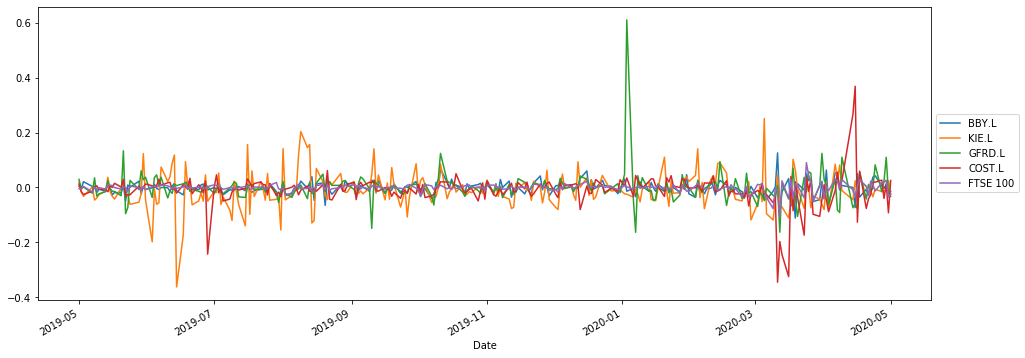

In [25]:
const_stocks.xs(key='Per Chg',axis=1,level='Stock Info').plot(figsize=(16,6))
plt.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

Closer look from Jan-20 onwards

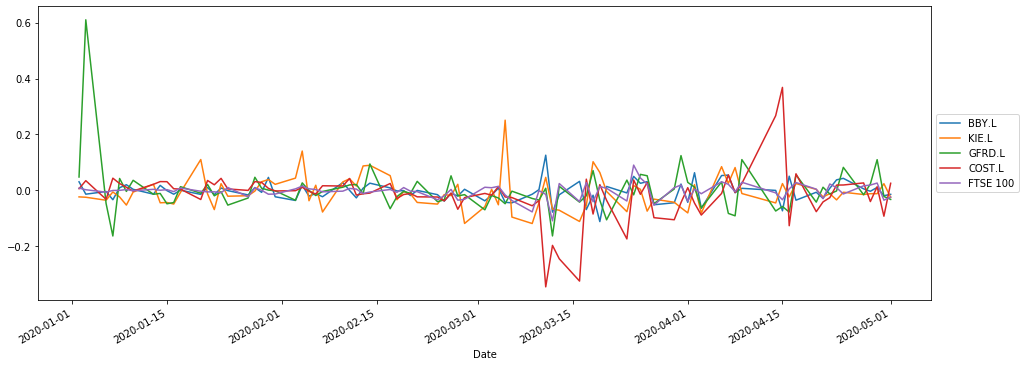

In [26]:
const_stocks.loc['2020-01-01':'2020-05-01'].xs(key='Per Chg',axis=1,level='Stock Info').plot(figsize=(16,6))
plt.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

Calc average for construction co. stocks, compare to FTSE 100 performance

In [27]:
const_stocks['Const Avg', 'Per Chg'] = const_stocks.iloc[:,[6,13,20,27]].mean(axis=1)
const_stocks.sort_index(axis=1)
const_stocks.head()

Const. Ticker       BBY.L                                                 \
Stock Info           High         Low        Open       Close     Volume   
Date                                                                       
2019-05-01     253.000000  249.399994  250.600006  251.800003   983599.0   
2019-05-02     251.800003  248.000000  250.000000  248.800003  1613547.0   
2019-05-03     252.800003  246.399994  246.399994  251.600006  1449880.0   
2019-05-07     250.199997  245.399994  247.000000  248.000000  1356369.0   
2019-05-08     251.399994  245.399994  249.000000  250.199997  2034454.0   

Const. Ticker                             KIE.L                          ...  \
Stock Info      Adj Close   Per Chg        High         Low        Open  ...   
Date                                                                     ...   
2019-05-01     246.238556  0.004788  384.000000  368.799988  374.399994  ...   
2019-05-02     243.304810 -0.004800  382.600006  374.000000  381.000000  ...   
2019-05-03     246.042984  0.021104  379.399994  360.799988  375.000000  ...   
2019-05-07     242.522476  0.004049  363.600006  326.600006  357.799988  ...   
2019-05-08     244.673889  0.004819  368.000000  345.399994  362.600006  ...   

Const. Ticker COST.L                                 FTSE 100           \
Stock Info     Close    Volume   Adj Close   Per Chg     High      Low   
Date                                                                     
2019-05-01     333.0   67490.0  325.422760  0.012158  7446.46  7379.65   
2019-05-02     325.5  343906.0  318.093414 -0.015129  7393.94  7339.45   
2019-05-03     325.0   83667.0  317.604797 -0.025487  7418.17  7350.01   
2019-05-07     325.5  181279.0  318.093414 -0.013636  7380.64  7251.03   
2019-05-08     325.5  105150.0  318.093414  0.001538  7278.26  7222.88   

Const. Ticker                             Const Avg  
Stock Info        Open    Close   Per Chg   Per Chg  
Date                                                 
2019-05-01     7418.22  7385.26 -0.004443  0.016424  
2019-05-02     7385.26  7351.31 -0.004597 -0.010263  
2019-05-03     7351.31  7380.64  0.003990 -0.008645  
2019-05-07     7380.64  7260.47 -0.016282 -0.007098  
2019-05-08     7260.47  7271.00  0.001450 -0.001064  

[5 rows x 34 columns]

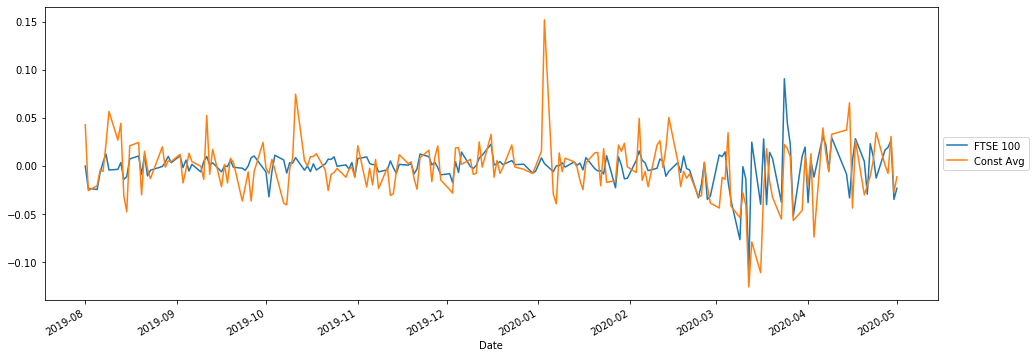

In [38]:
const_stocks[['FTSE 100','Const Avg']].loc['2019-08-01':'2020-05-01'].xs(key='Per Chg',axis=1,level='Stock Info').plot(figsize=(16,6))
plt.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

Compare 30 day rolling averages for clarity

<Figure size 864x432 with 0 Axes>

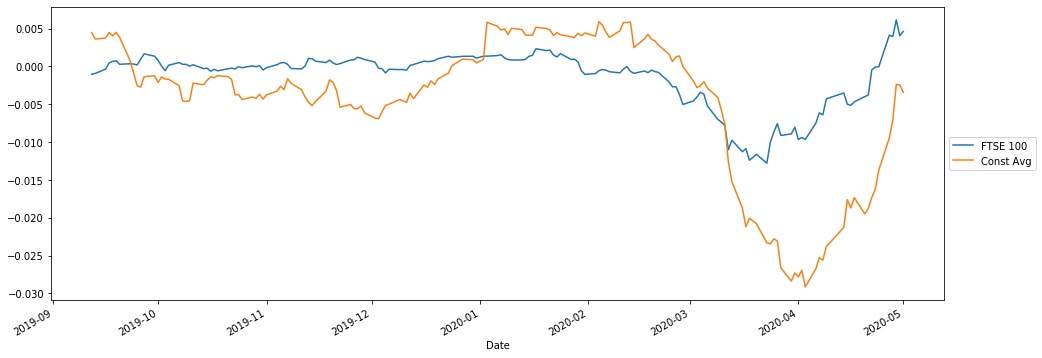

In [39]:
plt.figure(figsize=(12,6))
const_stocks[['FTSE 100','Const Avg']].loc['2019-08-01':'2020-05-01'].xs(key='Per Chg',axis=1,level='Stock Info').rolling(window=30).mean().plot(figsize=(16,6))
plt.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

Conclusion:

    Construction sector poorer performance leading up to Jan-20, followed by higher performance between Jan-Mar-20.
    Construction sector followed similar trend to FTSE 100 but higher impact.
    
Further Questions:

    What happened 1st Jan 2020 for increase in construction sector?

NB - construction data for selected companies only, not whole of market

Check on returns for each

In [ ]:
returns = pd.DataFrame()

In [ ]:
for tick in tickers:
    returns[tick+' Return'] = const_stocks[tick]['Close'].pct_change()
returns.head()

In [ ]:
sns.pairplot(returns,dropna=True)

Date of Best & Worst Returns

In [ ]:
# Best Returns
returns.idxmax()

In [ ]:
# Worst Returns
returns.idxmin()

Standard Deviation for risk - between Kier and Costain for most risk

In [ ]:
returns.std()

Distribution plot for Kier and Costain returns

In [ ]:
sns.distplot(returns['COST.L Return'],color='green',bins=30)

In [ ]:
sns.distplot(returns['KIE.L Return'],color='red',bins=30)

30 day moving averages

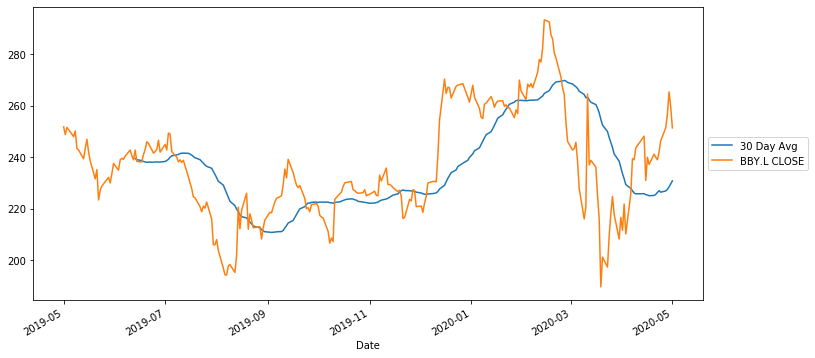

In [63]:
# Balfour Beatty
plt.figure(figsize=(12,6))
BBY['Close'].rolling(window=30).mean().plot(label='30 Day Avg')
BBY['Close'].plot(label='BBY.L CLOSE')
plt.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

BBY large gain Dec 2019, co-incides with decline in Costain (poss selling one, buying the other?)
Trading update 12/12/20 indicated good news -
https://www.sharesmagazine.co.uk/news/market/6709024/Balfour-Beatty-Trading-Update
Whereas Costain issued a £20m profit warning on the same date -
https://www.constructionnews.co.uk/contractors/costain/costain-issues-new-20m-profit-warning-dispute-ruling-12-12-2019/

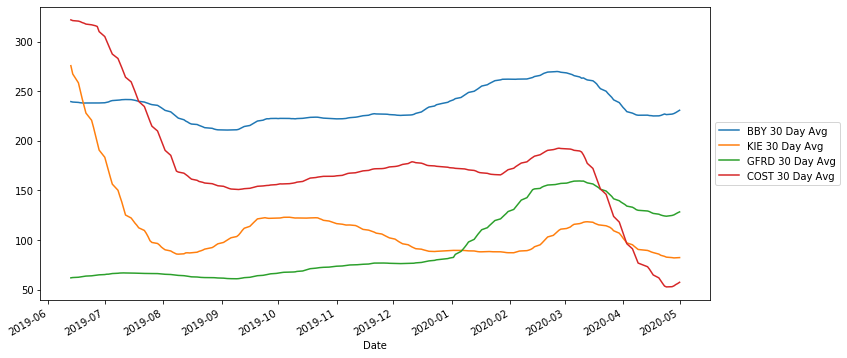

In [64]:
# All 30 day averages
plt.figure(figsize=(12,6))
BBY['Close'].rolling(window=30).mean().plot(label='BBY 30 Day Avg')
KIE['Close'].rolling(window=30).mean().plot(label='KIE 30 Day Avg')
GFRD['Close'].rolling(window=30).mean().plot(label='GFRD 30 Day Avg')
#MGNS['Close'].rolling(window=30).mean().plot(label='MGNS 30 Day Avg')
COST['Close'].rolling(window=30).mean().plot(label='COST 30 Day Avg')
plt.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

Zoom in to UK lock down start (23/03/20)
NB - started from 1st March, but no data (Sunday), so moved start to 2nd March
NB2 - kept starting data from 15-04-20 -- due to 30 day window, so changed to 5 day moving average from start of March
NB3 - removed Morgan Sindall (data seems high?)

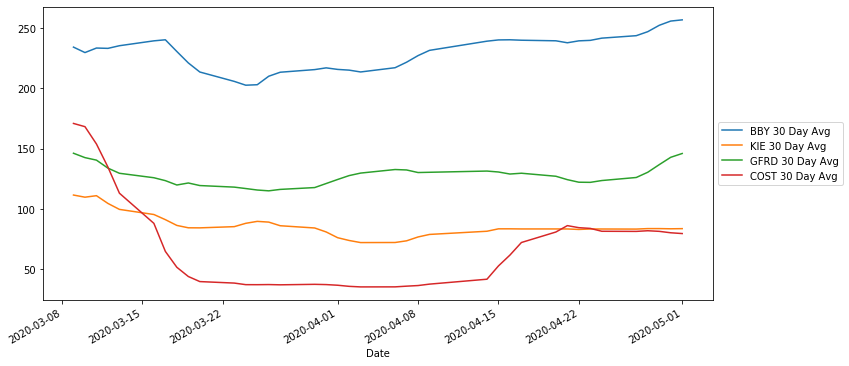

In [65]:
plt.figure(figsize=(12,6))
BBY['Close'].loc['2020-03-03':'2020-05-01'].rolling(window=5).mean().plot(label='BBY 30 Day Avg')
KIE['Close'].loc['2020-03-03':'2020-05-01'].rolling(window=5).mean().plot(label='KIE 30 Day Avg')
GFRD['Close'].loc['2020-03-03':'2020-05-01'].rolling(window=5).mean().plot(label='GFRD 30 Day Avg')
#MGNS['Close'].loc['2020-03-02':'2020-05-01'].rolling(window=30).mean().plot(label='MGNS 30 Day Avg')
COST['Close'].loc['2020-03-03':'2020-05-01'].rolling(window=5).mean().plot(label='COST 30 Day Avg')
plt.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

Costain biggest decline, all drops seem prior to the lockdown date (speculation?)

Interactive plot of above
1 - new dataframe for close prices for all stocks
2 - iplot this new dataframe

In [ ]:
const_moving = const_stocks.xs(key='Close',axis=1,level='Stock Info').rolling(window=5).mean().reset_index()
const_moving.head(10)

In [ ]:
const_moving.iplot(kind='line',x='Date',mode='lines',size=5)

General decline from Feb for all, Costain large fall March 10th, all others gained (biggest gain - BBY)

Is there correlation in the stocks close price?

In [ ]:
sns.heatmap(const_stocks.xs(key='Close',axis=1,level='Stock Info').corr()\
            ,cmap='YlGnBu',linecolor='white',linewidths=1,annot=True)

Strong correlation between Kier and Costain, Balfour Beatty and MGNS

In [ ]:
sns.clustermap(const_stocks.xs(key='Close',axis=1,level='Stock Info').corr()\
               ,cmap='YlGnBu',linecolor='white',linewidths=1,annot=True)

Candle Plot for Balfour Beatty Stock May-19 to May-20

In [ ]:
const_stocks.xs(key='BBY.L',axis=1,level='Const. Ticker')\
    .iplot(kind='candle',x='Date',title='BBY Stock May-2019 to May-2020')